## <center> COVID-19-Simulation</center>

### Part 0: A SIER cellular automata model:

#### Conceptual Model:
1. Cellular Automata Framework:
2. Geographical Model:
3. Diesase Model:

#### Data Source:
Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)
- [Blog](https://systems.jhu.edu/research/public-health/ncov/)
- [Dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)

#### Data used:
[CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)
    1. time_series_covid19_confirmed_US.csv
    2. time_series_covid19_confirmed_global.csv
    3. time_series_covid19_deaths_US.csv
    4. time_series_covid19_deaths_global.csv
    5. time_series_covid19_recovered_global.csv
    
    

#### Data Pre-processing, basic statistics and insights:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def preprocess_US(data_url):
    df = pd.read_csv(data_url)
    last_update_date = df.keys()[-1]
    df.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Lat','Long_'], axis = 1, inplace = True)
    df_cleaned= df.groupby(['Province_State'], as_index = False).sum()
    df_sorted = df_cleaned.sort_values(by=last_update_date,ascending=False).reset_index(drop=True)
    update_total = sum(df_sorted[last_update_date])
    return df_sorted, last_update_date, update_total


In [39]:
### Retrieve data from CSSEGISandData Github Raw content in csv
url_confirmed_US = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
url_deaths_US = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'


df_confirmed_US,last_confirmed_US,total_confirmed_US = preprocess_US(url_confirmed_US)
df_deaths_US,last_deaths_US,total_deaths_US = preprocess_US(url_deaths_US)
first_date_US = df_confirmed_US.keys()[1]
print("Data Basic Statistics: \n")
print('From {} till {} the US confirmed cases total is : {} \n'.format(first_date_US,last_confirmed_US,total_confirmed_US))
print('From {} till {} the US deaths cases total is : {} \n'.format(first_date_US,last_deaths_US,total_deaths_US))
mortality_rate = float(total_deaths_US)/float(total_confirmed_US)*100
print('Mortality rate in US is being updated as {:.3f}% \n'.format(mortality_rate))
US_population_list = df_deaths_US['Population']
US_population = US_population_list.sum()
df_deaths_US.drop(['Population'], axis = 1, inplace = True)
print('COVID-19 is among US population of {:.5f}% and fatal rate is {:.5f}% \n'.format(float(total_confirmed_US)/float(US_population)*100, float(total_deaths_US)/float(US_population)*100))

Data Basic Statistics: 

From 1/22/20 till 4/4/20 the US confirmed cases total is : 308845 

From 1/22/20 till 4/4/20 the US deaths cases total is : 8407 

Mortality rate in US is being updated as 2.722% 

COVID-19 is among US population of 0.09186% and fatal rate is 0.00250% 



In [69]:
def get_top_rank(sorted_df,compare_df,rank):
    # Create an empty list
    container = {}
    rows_list = []
    rows_compare_list=[]
    state_sorted_order = []
    # Iterate over each row 
    for index, row in sorted_df.iterrows():
        if index <rank:
            row_list = row.to_list()
            container[row_list[0]] = [row_list[1:]]
            state_sorted_order.append(row_list[0])
    for index_compare, row_compare in compare_df.iterrows():
        row_compare_list = row_compare.to_list()
        if row_compare_list[0] in container:
            container[row_compare_list[0]].append(row_compare_list[1:])
    return container, state_sorted_order
        
    

container, state_list = get_top_rank(df_confirmed_US,df_deaths_US,5)
# deaths_top_5 = get_top_5(df_deaths_US)

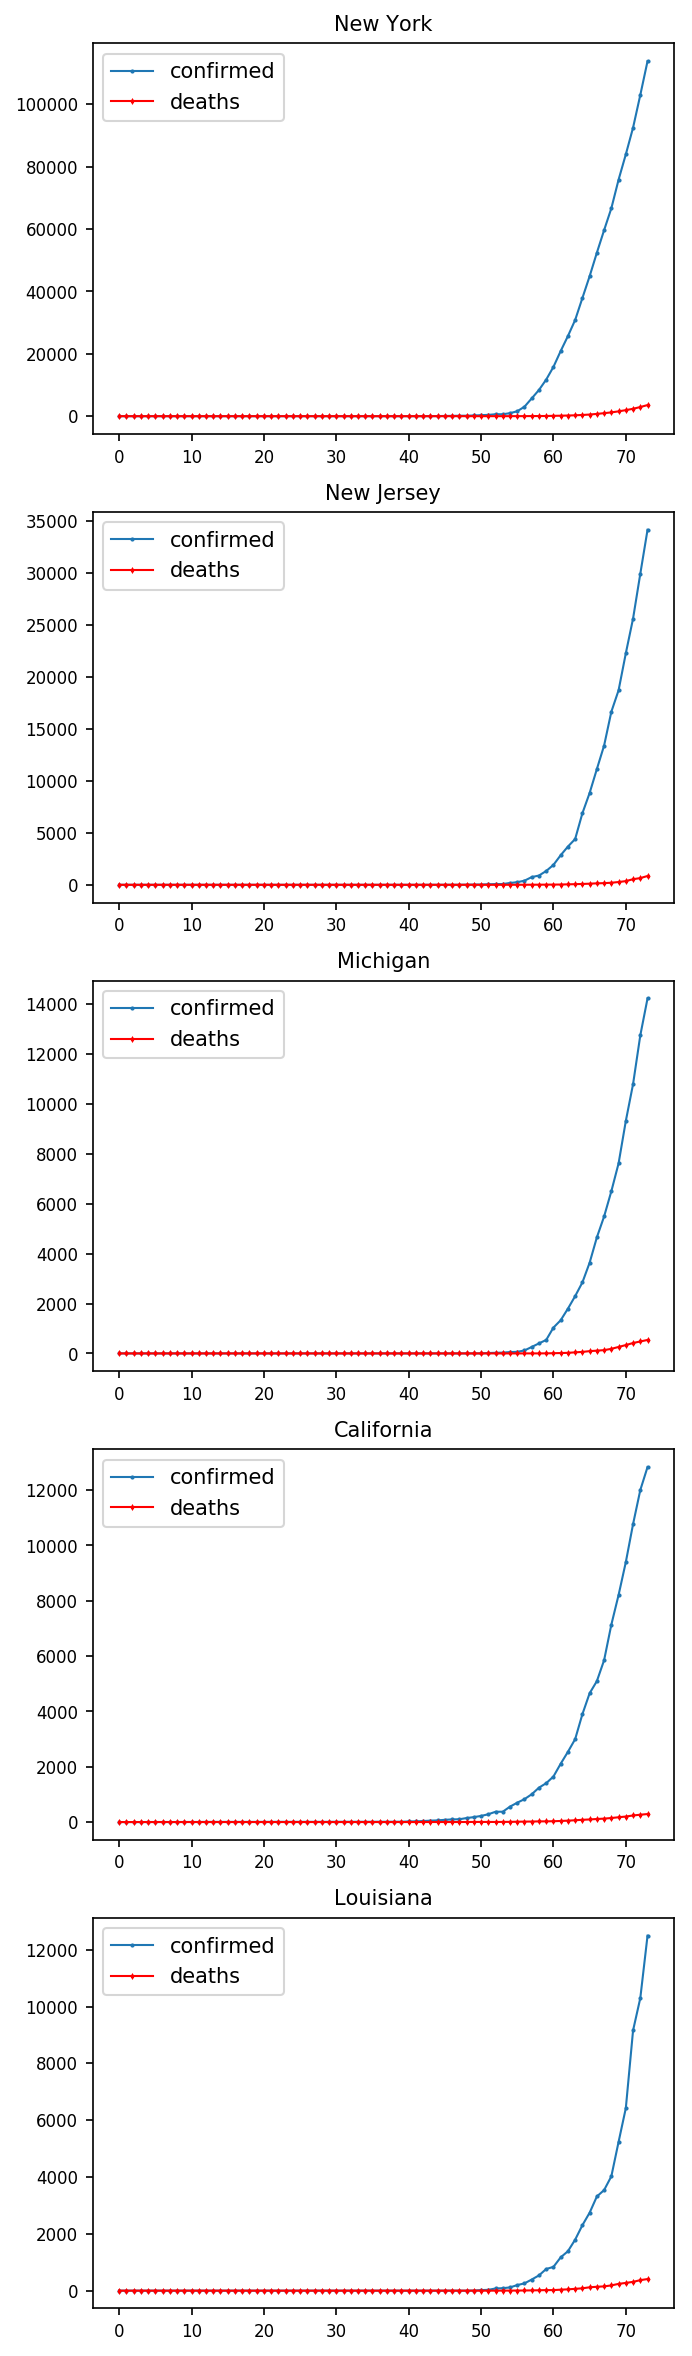

In [112]:
fig, ax = plt.subplots(ncols = 1, nrows = len(state_list), figsize = (5,20), dpi = 150)
for i in range(len(state_list)):
    ax[i].plot(container[state_list[i]][0],'o-',label="confirmed", linewidth=1,markersize=1)
    ax[i].plot(container[state_list[i]][1],'rd-',label= "deaths", linewidth=1,markersize=1)
    ax[i].set_title(state_list[i],fontsize = 10)
    ax[i].tick_params(axis='x',labelsize=8)
    ax[i].tick_params(axis='y',labelsize=8)

    ax[i].legend()
    